In [66]:
import os 

directory = 'data/PetImages/'

# Get the labels from the directory 
labels = [x[1] for x in os.walk(directory)][0]

num_labels = len(labels)

# build dictionary for indexes
label_indexes = {labels[i]: i for i in range(0, len(labels))}

label_indexes

{'Cat': 0, 'Dog': 1}

In [67]:
from random import shuffle
import glob

# get the file paths 
data_files = glob.glob(directory + '**/*.jpg', recursive=True)

# shuffle the data 
shuffle(data_files)

num_data_files = len(data_files)
print(num_data_files)

25000


In [68]:
data_labels = []
# build the labels 
for file in data_files:
    # file will be /data/{category}/image_name.jpg so we 
    # extract category
    label = file.split('/')[2]
    data_labels.append(label_indexes[label])

assert num_data_files == len(data_labels)

In [70]:
import numpy as np

def one_hot(label_array, num_classes):
  return np.squeeze(np.eye(num_classes)[label_array.reshape(-1)])

data_labels = np.array(data_labels)

# For our Cat/Dogs datasets we have 2 categories 
data_labels = one_hot(data_labels, 2) 

In [74]:
# TRAIN/TEST split 
data_labels_one_hot = data_labels

# The percentage of the data which will be used in the test set
TRAIN_TEST_SPLIT = 0.15 

nr_test_data = int(num_data_files * TRAIN_TEST_SPLIT)

train_data_files = np.array(data_files[nr_test_data:])
test_data_files = np.array(data_files[:nr_test_data])

train_labels = np.array(data_labels_one_hot[nr_test_data:])
test_labels = np.array(data_labels_one_hot[:nr_test_data])

assert len(train_labels) + len(test_labels) == num_data_files
assert len(test_data_files) + len(train_data_files) == num_data_files

In [131]:
import cv2 

IMAGE_SIZE = 128

def read_image(filename): 
    image = cv2.imread(filename)
    resized_image = cv2.resize(image, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_CUBIC)
    return resized_image

# Creating batches 
def get_random_batch(batch_size=128):
    # extract a random subset of indexes
    indexes_subset = np.random.randint(0, test_data_files.shape[0], size=batch_size)
    
    filename_batch = train_data_files[indexes_subset]
    image_batch = [read_image(file) for file in filename_batch]
    
    label_batch = train_labels[indexes_subset]
    
    
    return image_batch, label_batch

In [132]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline 

image, label = get_random_batch()

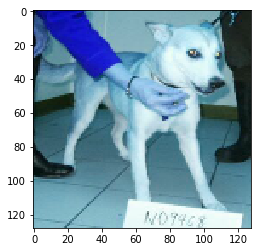

In [133]:
plt.imshow(image[0])